In [32]:
import pandas as pd

# Lista com os nomes dos arquivos CSV
arquivos_csv = ["datas/acid_vas_cerebral.csv", "datas/tabagismo.csv", "datas/infarto_mio.csv", "datas/renal.csv","datas/sedentarismo.csv","datas/sobrepeso.csv"]
doencas = ['acid_vas_cerebral', 'tabagismo', 'infarto_mio', 'renal', 'sedentarismo', 'sobrepeso']
dfs = [pd.read_csv(f"{data}", header=None, names=['cidade', 'sim', 'não', 'total'], delimiter=';') for data in arquivos_csv]


In [33]:
tabelas_concatenadas = []
for i,nome_tabela in enumerate(arquivos_csv):
    tabela = pd.read_csv(nome_tabela, header=None, names=['Cidade', 'Sim', 'Não', 'Total'], delimiter=';')
    tabela['Doenças'] = doencas[i]  # Adicione uma coluna com o nome da tabela
    tabelas_concatenadas.append(tabela)


In [41]:
# df_concatenado = pd.concat(tabelas_concatenadas, ignore_index=True)
# df_concatenado.to_csv('data_diseases.csv', index=False)
# df_concatenado['Sim'] = df_concatenado['Sim'].replace('-', '0')
df_concatenado = pd.read_csv('data_low.csv')

In [42]:
df_concatenado['Sim'] = df_concatenado['Sim'].replace('-', '0')
df_concatenado

,Cidade,Sim,Não,Total,Doenças
0,ABADIA DOS DOURADOS,0,2,2,acid_vas_cerebral
1,ABAETE,4,92,96,acid_vas_cerebral
2,ACAIACA,1,4,5,acid_vas_cerebral
3,ACUCENA,0,24,24,acid_vas_cerebral
4,ABADIA DOS DOURADOS,0,2,2,tabagismo
5,ABAETE,37,59,96,tabagismo
6,ACAIACA,0,5,5,tabagismo
7,ACUCENA,3,21,24,tabagismo
8,ABADIA DOS DOURADOS,0,2,2,infarto_mio
9,ABAETE,4,92,96,infarto_mio


In [43]:
# Obter cidades únicas
cidades = df_concatenado['Cidade'].unique()
cidades

array(['ABADIA DOS DOURADOS', 'ABAETE', 'ACAIACA', 'ACUCENA'],
      dtype=object)

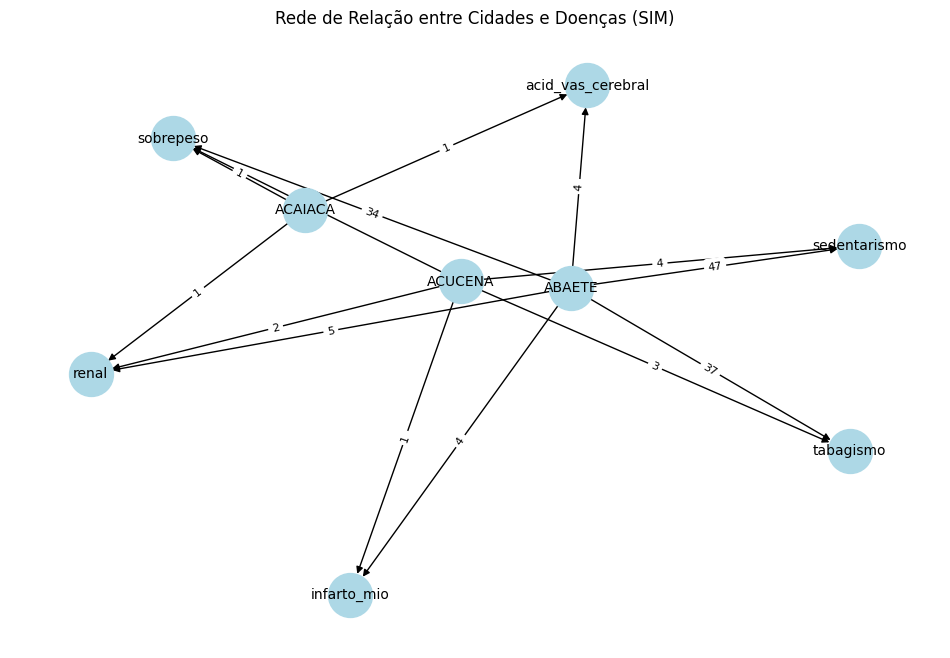

In [49]:
import networkx as nx
import matplotlib.pyplot as plt


# Criar um grafo direcionado
G = nx.DiGraph()

# Obter a lista de doenças únicas
doencas = df_concatenado['Doenças'].unique()

# Adicionar os nós das doenças ao grafo
G.add_nodes_from(doencas)

# Iterar sobre as linhas da tabela
for _, row in df_concatenado.iterrows():
    cidade = row['Cidade']
    doenca = row['Doenças']
    sim = row['Sim']
    if sim != '0':
        

        # Adicionar aresta entre cidade e doença com o peso sendo o valor de 'Sim'
        G.add_edge(cidade, doenca, weight=sim)

# Plotar o grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title('Rede de Relação entre Cidades e Doenças (SIM)')
plt.axis('off')
plt.show()

Grau de cada vertice


In [53]:
nx.degree(G)

DiDegreeView({'acid_vas_cerebral': 2, 'tabagismo': 2, 'infarto_mio': 2, 'renal': 3, 'sedentarismo': 2, 'sobrepeso': 3, 'ABAETE': 6, 'ACAIACA': 3, 'ACUCENA': 5})

Centralidade dos Vertices por clonseness

In [52]:
nx.closeness_centrality(G)

{'acid_vas_cerebral': 0.25,
 'tabagismo': 0.25,
 'infarto_mio': 0.25,
 'renal': 0.375,
 'sedentarismo': 0.25,
 'sobrepeso': 0.375,
 'ABAETE': 0.0,
 'ACAIACA': 0.0,
 'ACUCENA': 0.0}

Centralidade da rede por Grau


In [54]:
nx.degree_centrality(G)

{'acid_vas_cerebral': 0.25,
 'tabagismo': 0.25,
 'infarto_mio': 0.25,
 'renal': 0.375,
 'sedentarismo': 0.25,
 'sobrepeso': 0.375,
 'ABAETE': 0.75,
 'ACAIACA': 0.375,
 'ACUCENA': 0.625}

plot da rede  proporcional a centralidade por grau

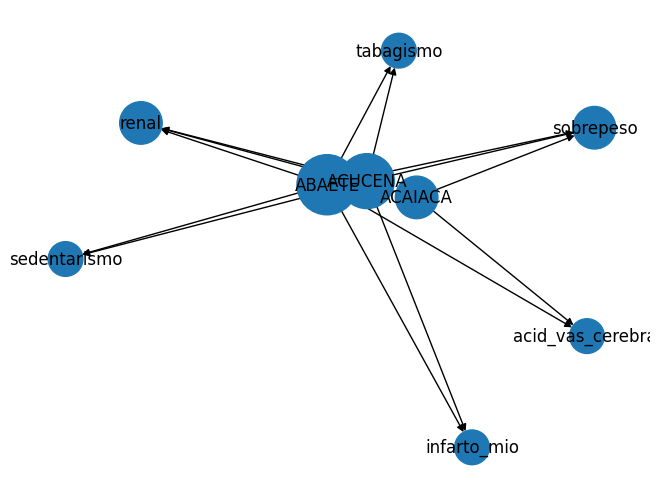

In [55]:
node_sizes = [node*2500 for node in nx.degree_centrality(G).values()]
nx.draw(G, with_labels=True, node_size=node_sizes)